In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

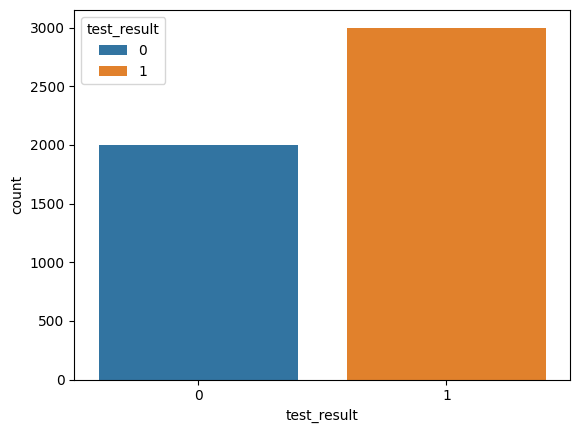

In [7]:
sns.countplot(data = df,x = 'test_result',hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

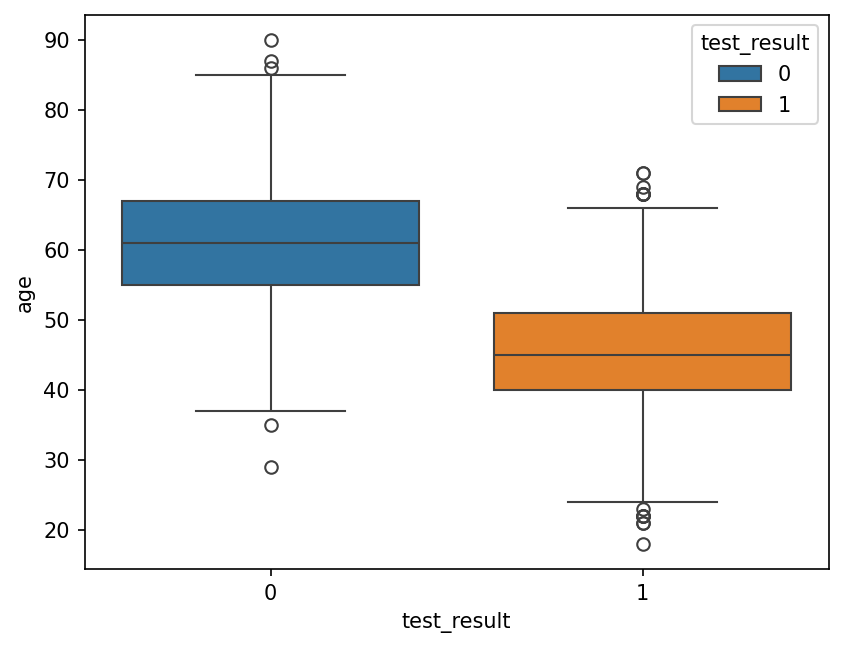

In [8]:
plt.figure(dpi=150)
sns.boxplot(x = 'test_result',y = 'age' , data = df ,hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

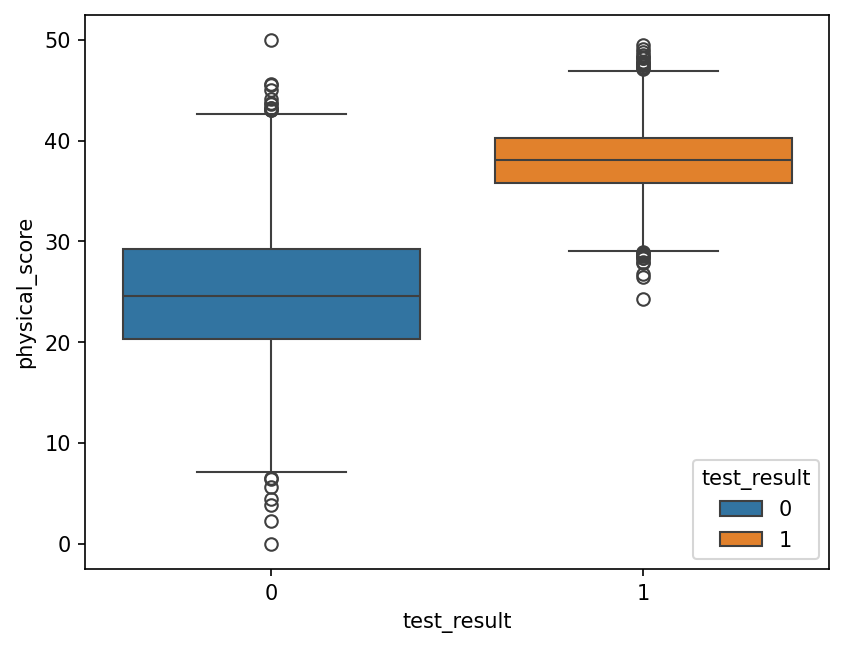

In [9]:
plt.figure(dpi=150)
sns.boxplot(x = 'test_result',y = 'physical_score' , data = df ,hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

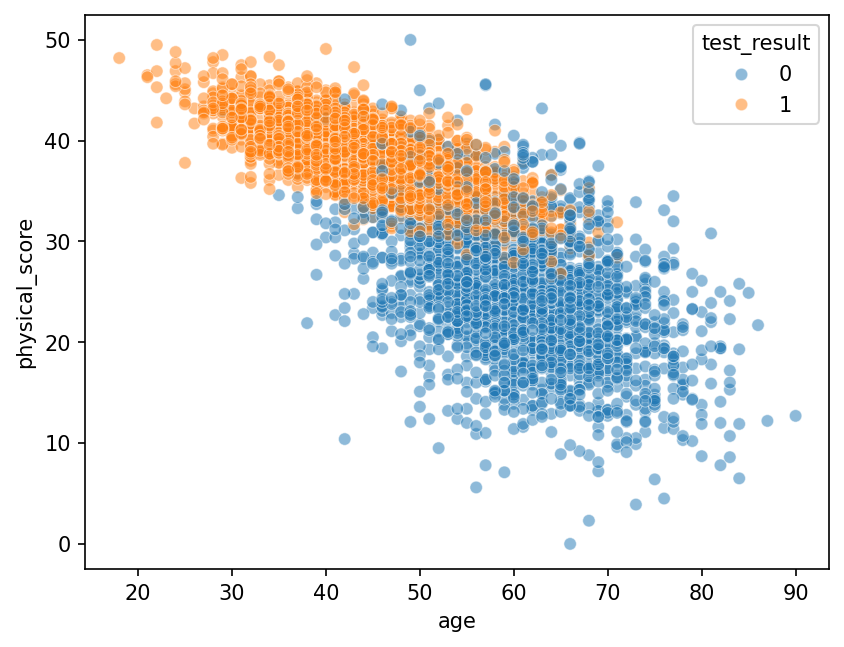

In [10]:
plt.figure(dpi=150)
sns.scatterplot(x = 'age', y ='physical_score' ,data = df,hue = 'test_result',alpha = 0.5)

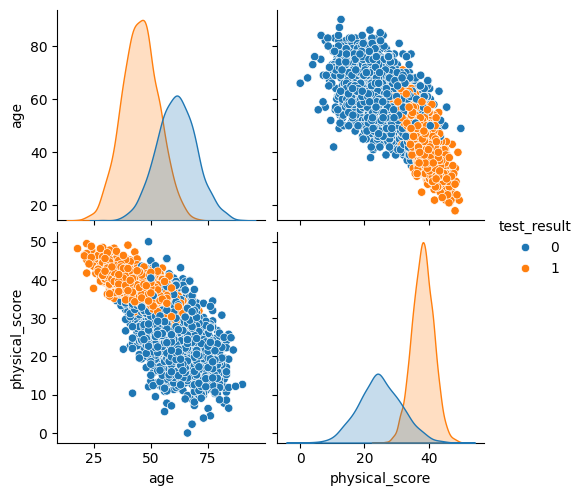

In [11]:
sns.pairplot(df,hue='test_result')

<Axes: >

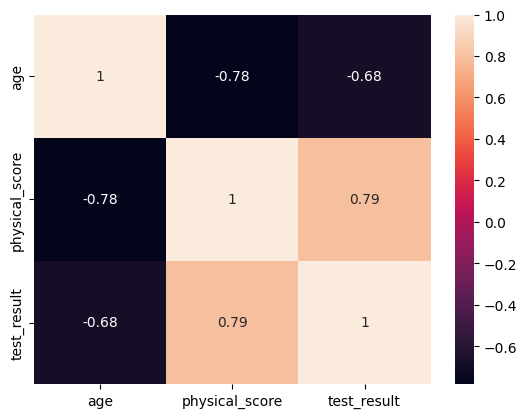

In [12]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

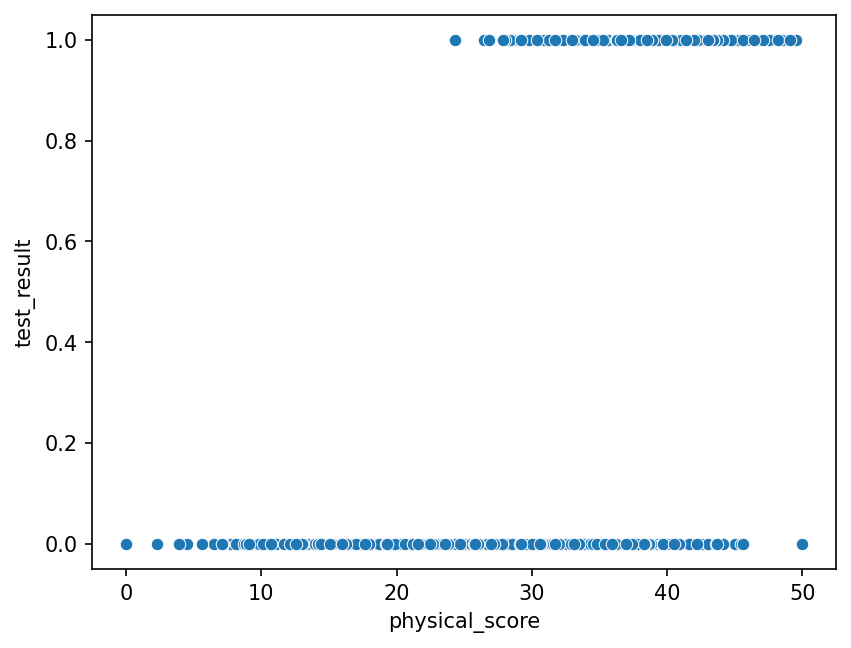

In [13]:
plt.figure(dpi=150)
sns.scatterplot(y = 'test_result', x ='physical_score' ,data = df)

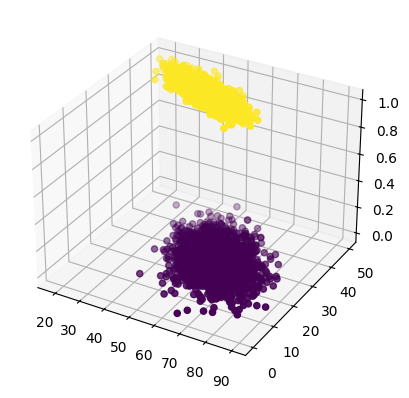

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c = df['test_result'])


In [15]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [16]:
X = df.drop('test_result',axis = 1)

In [17]:
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=101)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [28]:
# y_pred = log_model.predict(scaled_X_test)

In [29]:
# y_pred

In [30]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
y_pred = log_model.predict(scaled_X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.93

In [34]:
cm = confusion_matrix(y_test,y_pred, labels=log_model.classes_)

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay


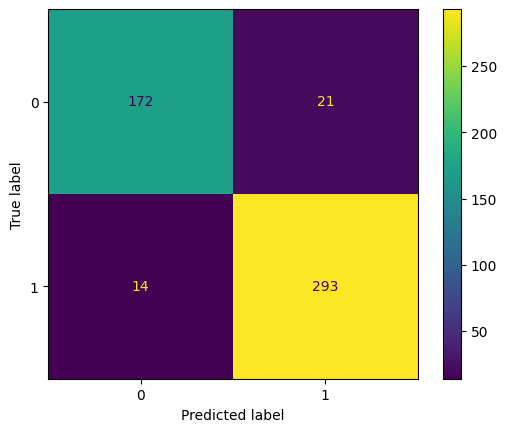

In [36]:
# cm_normalized = cm.astype('float') / cm.sum()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [37]:
len(y_test)

500

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import recall_score,precision_score

In [40]:
precision_score(y_test,y_pred)

0.9331210191082803

In [41]:
recall_score(y_test,y_pred)

0.9543973941368078

In [42]:
from sklearn.metrics import precision_recall_curve,roc_curve,RocCurveDisplay,auc

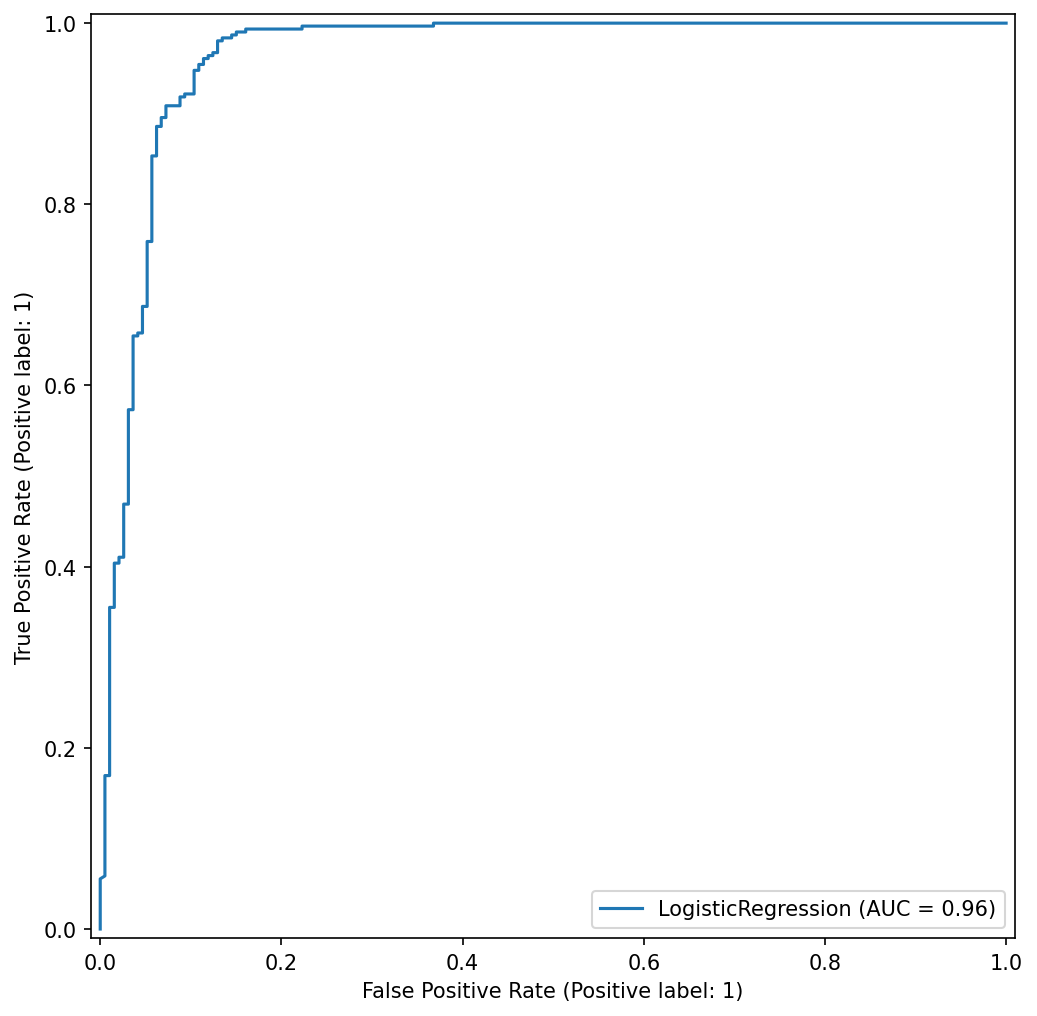

In [47]:
from sklearn.metrics import RocCurveDisplay

fig,ax  = plt.subplots(figsize =(12,8),dpi=150)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test,ax=ax)
plt.show()


In [75]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

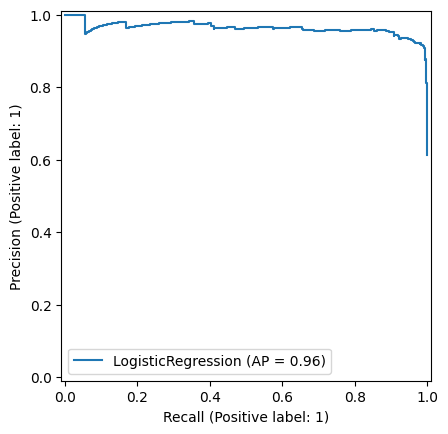

In [82]:

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()

In [ ]:
log_model.p